In [ ]:
# try convert pdf to image

from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)
images = convert_from_path('test.pdf')
images[0].save("test1.png")

In [160]:
# python convert number to raw binary bits, and do some bit operation

import numpy
import struct
a = numpy.float32(2)

def binaryPrint(x):
    print("{0:b}".format(x))
    
def floatToBits(a):
    x = struct.pack("<f", a)
    return struct.unpack("<I", x)[0]

def bitsToFloat(a):
    x = struct.pack("<I", a)
    return struct.unpack("<f", x)[0]

def assambleFloat32(sign, exp, mantissa):
    signPart = sign << 31
    expPart = exp << 23
    mantissaPart = mantissa
    
    bits = numpy.uint32(signPart | expPart | mantissaPart);
    binaryPrint(signPart)
    binaryPrint(expPart)
    binaryPrint(mantissaPart)
    binaryPrint(bits)
    return bitsToFloat(bits)
    

assambleFloat32(0, 127, 11 << 21)

0
111111100000000000000000000000
1011000000000000000000000
111111111000000000000000000000


1.75

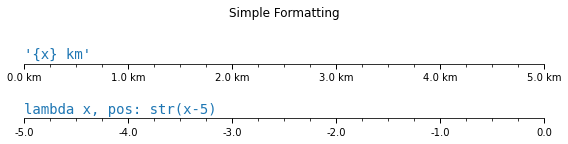

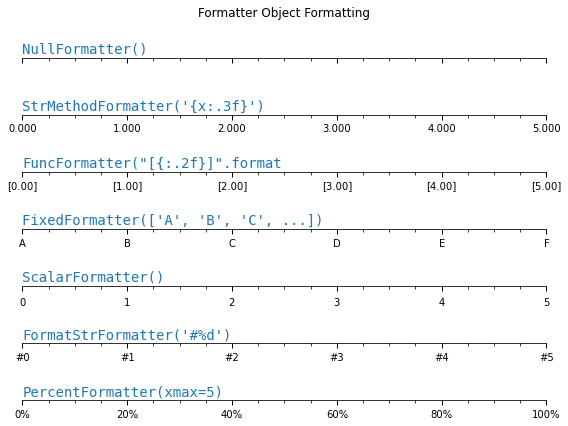

In [4]:
# matplotlib example

import matplotlib.pyplot as plt
from matplotlib import ticker


def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')

    # define tick positions
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 100)
    ax.text(0.0, 0.2, title, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')


# Tick formatters can be set in one of two ways, either by passing a ``str``
# or function to `~.Axis.set_major_formatter` or `~.Axis.set_minor_formatter`,
# or by creating an instance of one of the various `~.ticker.Formatter` classes
# and providing that to `~.Axis.set_major_formatter` or
# `~.Axis.set_minor_formatter`.

# The first two examples directly pass a ``str`` or function.

fig0, axs0 = plt.subplots(2, 1, figsize=(8, 2))
fig0.suptitle('Simple Formatting')

# A ``str``, using format string function syntax, can be used directly as a
# formatter.  The variable ``x`` is the tick value and the variable ``pos`` is
# tick position.  This creates a StrMethodFormatter automatically.
setup(axs0[0], title="'{x} km'")
axs0[0].xaxis.set_major_formatter('{x} km')

# A function can also be used directly as a formatter. The function must take
# two arguments: ``x`` for the tick value and ``pos`` for the tick position,
# and must return a ``str``  This creates a FuncFormatter automatically.
setup(axs0[1], title="lambda x, pos: str(x-5)")
axs0[1].xaxis.set_major_formatter(lambda x, pos: str(x-5))

fig0.tight_layout()


# The remaining examples use Formatter objects.

fig1, axs1 = plt.subplots(7, 1, figsize=(8, 6))
fig1.suptitle('Formatter Object Formatting')

# Null formatter
setup(axs1[0], title="NullFormatter()")
axs1[0].xaxis.set_major_formatter(ticker.NullFormatter())

# StrMethod formatter
setup(axs1[1], title="StrMethodFormatter('{x:.3f}')")
axs1[1].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))


# FuncFormatter can be used as a decorator
@ticker.FuncFormatter
def major_formatter(x, pos):
    return f'[{x:.2f}]'


setup(axs1[2], title='FuncFormatter("[{:.2f}]".format')
axs1[2].xaxis.set_major_formatter(major_formatter)

# Fixed formatter
setup(axs1[3], title="FixedFormatter(['A', 'B', 'C', ...])")
# FixedFormatter should only be used together with FixedLocator.
# Otherwise, one cannot be sure where the labels will end up.
positions = [0, 1, 2, 3, 4, 5]
labels = ['A', 'B', 'C', 'D', 'E', 'F']
axs1[3].xaxis.set_major_locator(ticker.FixedLocator(positions))
axs1[3].xaxis.set_major_formatter(ticker.FixedFormatter(labels))

# Scalar formatter
setup(axs1[4], title="ScalarFormatter()")
axs1[4].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# FormatStr formatter
setup(axs1[5], title="FormatStrFormatter('#%d')")
axs1[5].xaxis.set_major_formatter(ticker.FormatStrFormatter("#%d"))

# Percent formatter
setup(axs1[6], title="PercentFormatter(xmax=5)")
axs1[6].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))

fig1.tight_layout()
plt.show()